In [1]:
#import all necessary libraries
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.optimize import curve_fit
import pylab
from IPython.display import Markdown, display

In [2]:
#loading student loans data
sloans_df = pd.read_csv("SLOANS.csv", header=0, parse_dates=['DATE'])
sloans_df = sloans_df.set_index('DATE')
sloans_df["VALUES"] = sloans_df["SLOANS"]
sloans_df.drop(columns=["SLOANS"], inplace=True)

C:\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


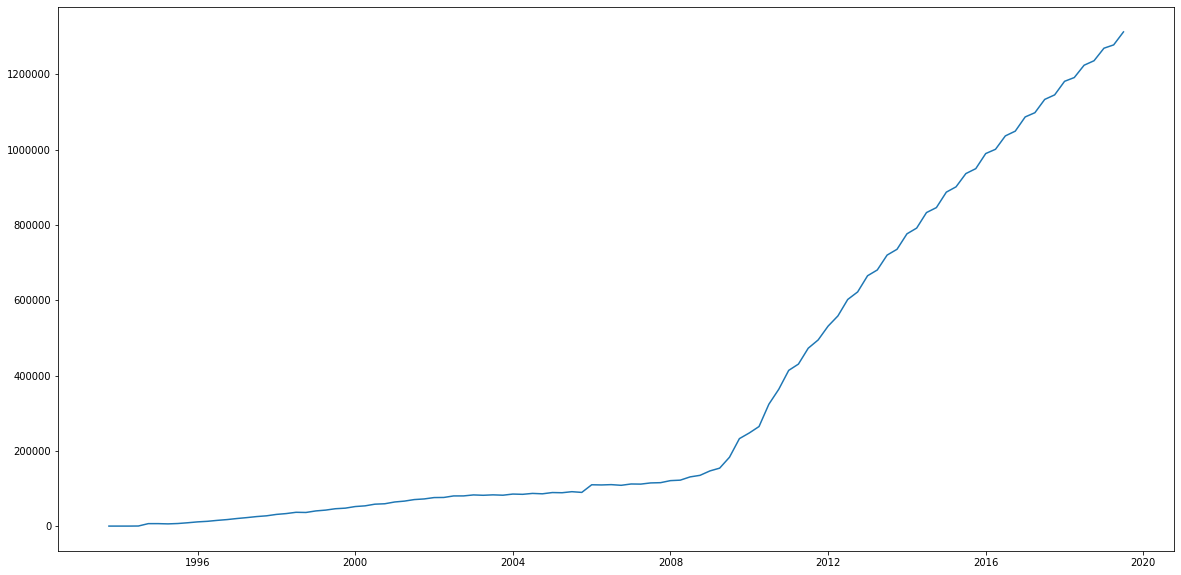

In [3]:
#graphing student loan data
plt.figure(figsize=(20,10))
plt.plot(sloans_df.index, sloans_df["VALUES"].values)
plt.show()

In [4]:
#looking at the data values
sloans_df

,VALUES
DATE,
1993-10-01,353.0
1994-01-01,350.0
1994-04-01,354.0
1994-07-01,558.0
1994-10-01,6865.0
...,...
2018-07-01,1224371.0
2018-10-01,1236272.0
2019-01-01,1269571.0


In [5]:
#loading gdp data
gdp_df = pd.read_csv("GDP.csv", header=0, parse_dates=['DATE'])
gdp_df = gdp_df.set_index('DATE')

In [6]:
#looking at first few values
gdp_df.head()

,GDP
DATE,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742


In [7]:
#Removing gdp data before 1993 since thats when student loans data starts

gdp_df = gdp_df[(gdp_df.index.year >= 1993)]

gdp_df["VALUES"] = gdp_df["GDP"]
gdp_df.drop(columns=["GDP"], inplace=True)

In [8]:
#getting percent that student loans takes up of gdp

new_df = sloans_df.div(gdp_df).div(10)

In [9]:
new_df

,VALUES
DATE,
1993-01-01,NaN
1993-04-01,NaN
1993-07-01,NaN
1993-10-01,0.005033
1994-01-01,0.004919
...,...
2018-07-01,5.900654
2018-10-01,5.915799
2019-01-01,6.017259


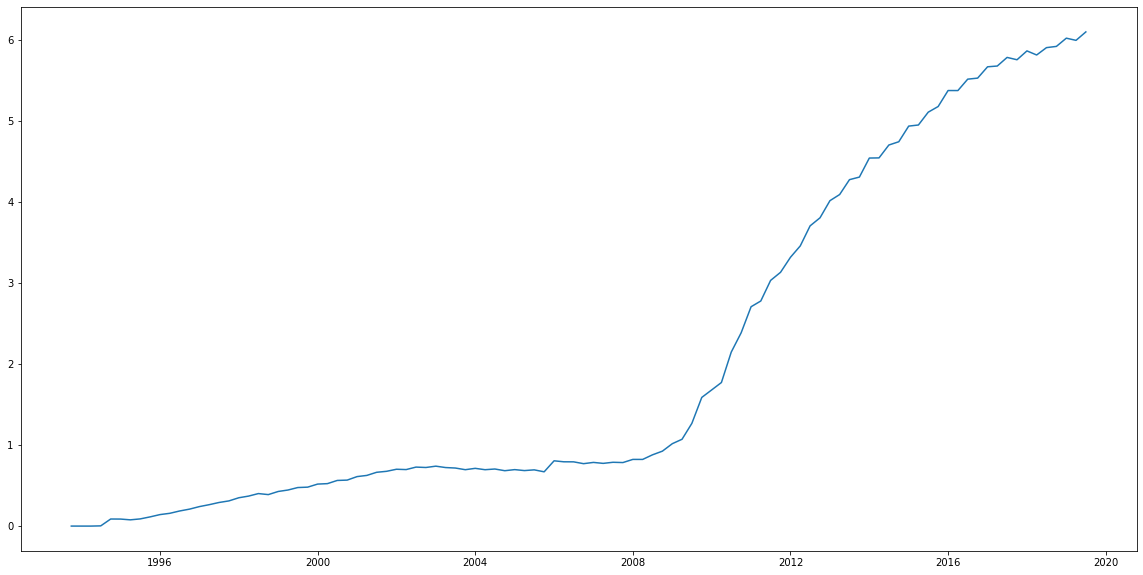

In [10]:
#plotting student loans over gdp

plt.figure(figsize=(20,10))
plt.plot(new_df.index, new_df["VALUES"].values)
plt.show()

In [11]:


#logistic curve function that we will be fitting to data. 
# a, b, and c are the values of the function that will change.
def logistic_curve(x, a, b, c):
    return a / (1.0 + (b * np.exp(-c * x)))

#code for fitting the curve either to the 2008 data or 2020 data and displaying curve equation and graphs.
#The After_2008 variable is for defining if we should use pre-2008 data, or 2008-2020 data.
def get_student_loans_curve(After_2008):
    
    if After_2008 == True:
        new_split_df = new_df[(new_df.index.year > 2008)]
    else:
        new_split_df = new_df[(new_df.index.year <= 2008)]
        
    new_split_df.dropna(inplace=True)

    xdata = new_split_df.reset_index().index.values
    ydata = new_split_df["VALUES"].values
    popt, pcov = curve_fit(logistic_curve, xdata, ydata)
    display(Markdown(f'<span style="color:blue">**y = {popt[0]} / (1.0 + {popt[1]} * e^-{popt[2]}x)**</span>'))
    x = np.linspace(-50, 65, 100)
    y = logistic_curve(x, *popt)

    plt.figure(figsize=(20,10))
    plt.plot(xdata, ydata, 'o', label='data')
    plt.plot(x,y, label='fit')
    plt.ylim(0, 6.5)
    plt.legend(loc='best')

    if After_2008 == True:
        plt.title("before 2020:", fontsize=20)
    else:
        plt.title("before 2008:", fontsize=20)

    plt.show()
    
    cc_ydata = popt[0] - ydata
    
    plt.figure(figsize=(20,10))
    plt.plot(xdata, cc_ydata, 'o', label='data')
    plt.plot(x,x*0, color='000', label='fit')
    plt.ylim(-0.02, 0.7)
    plt.legend(loc='best')
    if After_2008 == True:
        plt.title("before 2020:", fontsize=20)
    else:
        plt.title("before 2008:", fontsize=20)
    plt.show()
    if After_2008 == True:
        return xdata, ydata, popt, pcov, x, y, cc_ydata

C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


<span style="color:blue">**y = 0.7867077713397918 / (1.0 + 14.734708932958904 * e^-0.13659016925304338x)**</span>

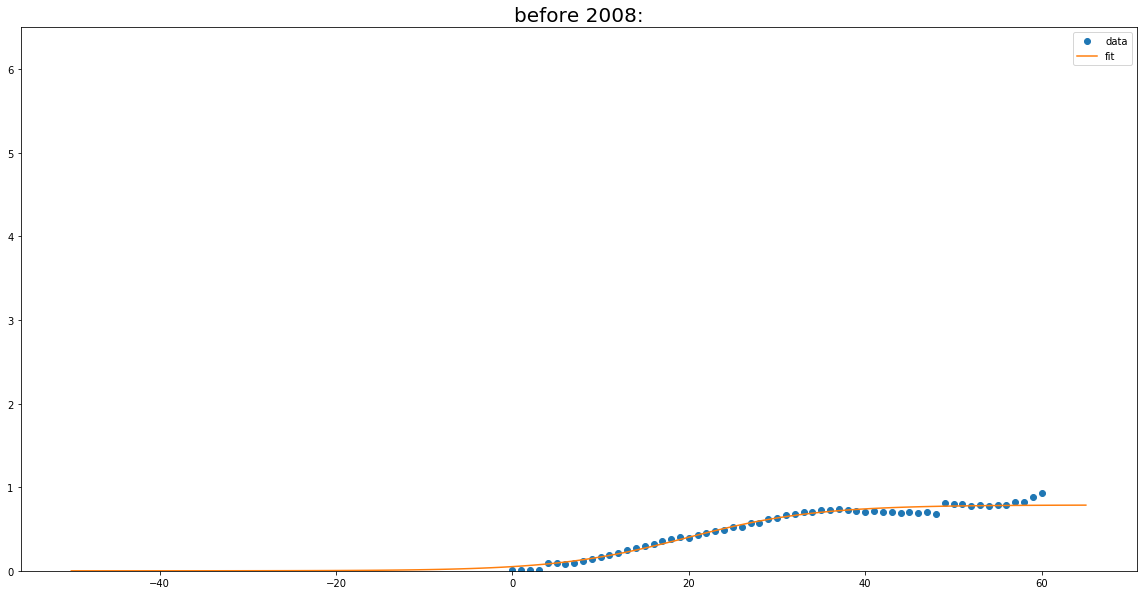

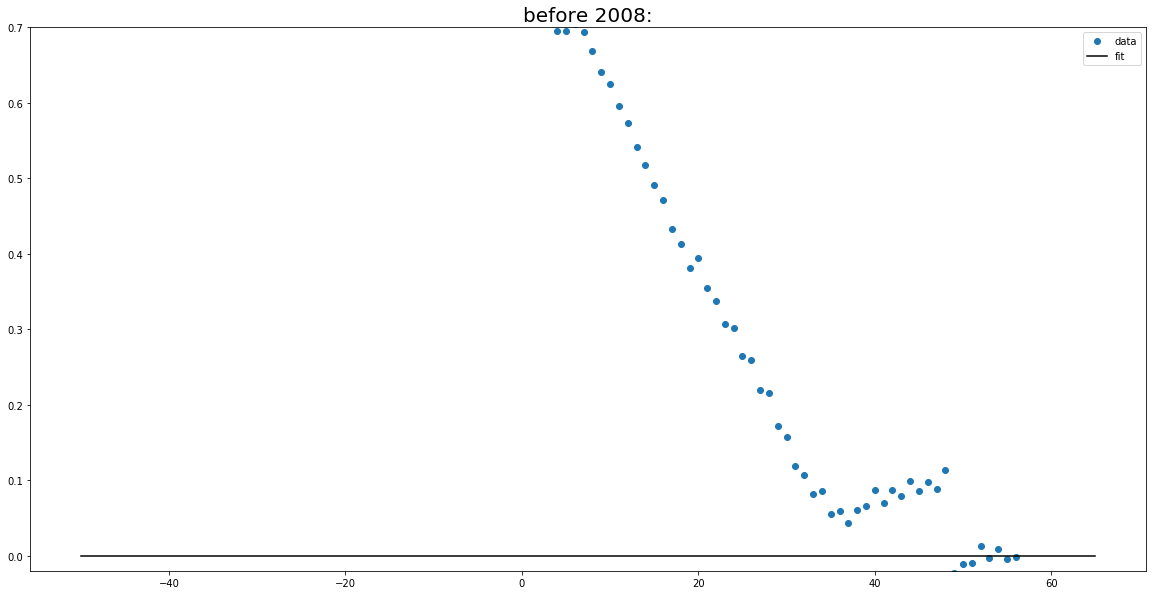

In [12]:
#get logistic curve regression for 2008 data

get_student_loans_curve(After_2008=False)

C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


<span style="color:blue">**y = 6.063679268603482 / (1.0 + 3.922497501988371 * e^-0.12294867390012947x)**</span>

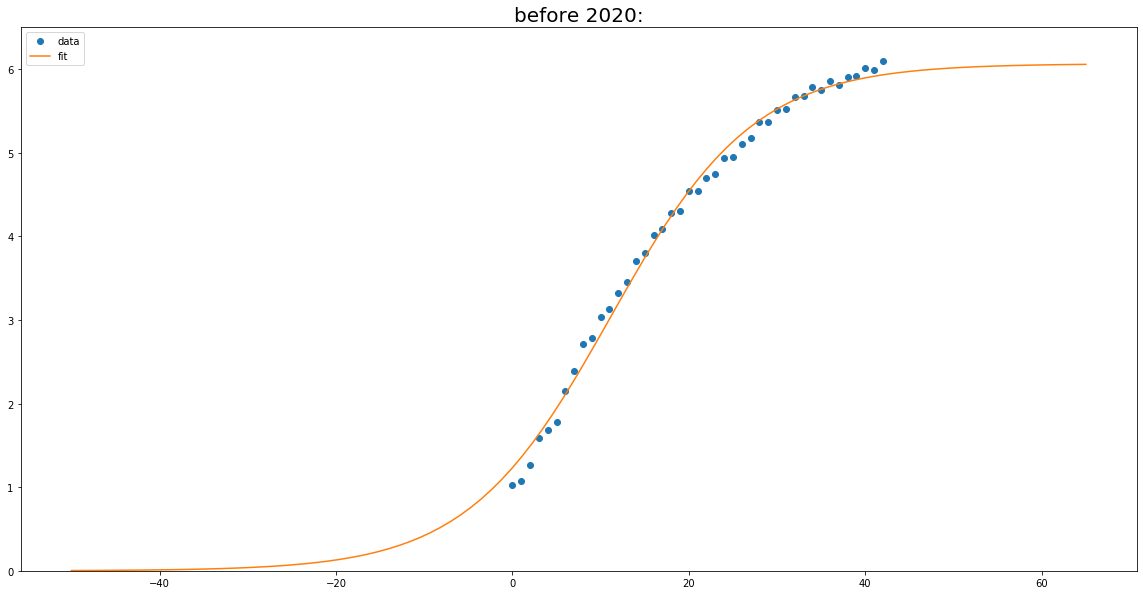

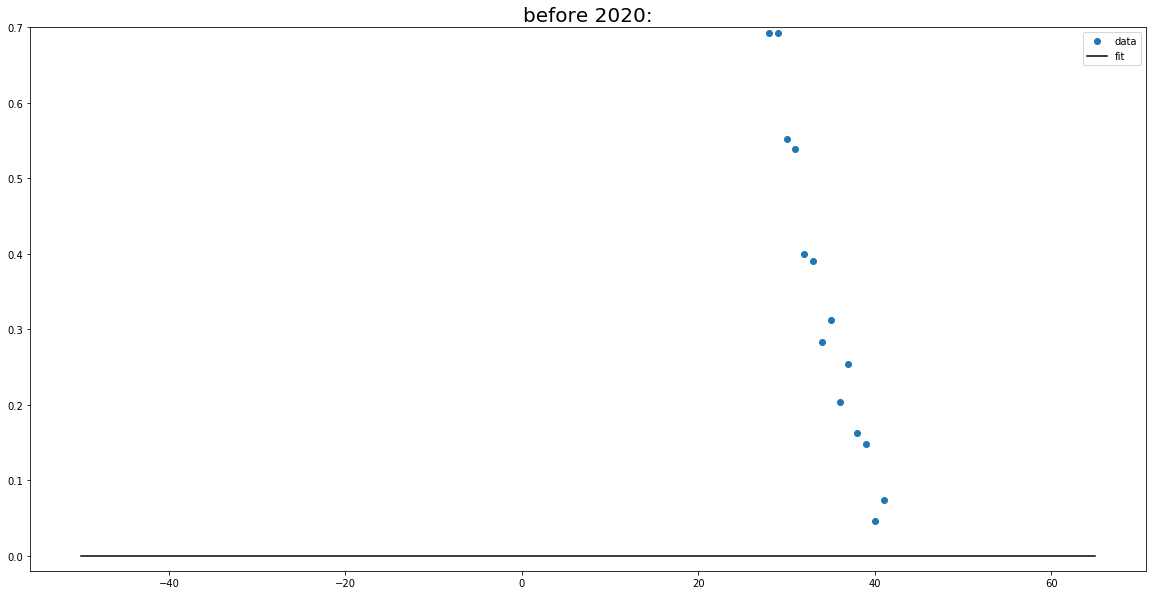

In [13]:
#get logistic curve regression for 2020 data

xdata, ydata, popt, pcov, x, y, cc_ydata = get_student_loans_curve(After_2008=True)

In [14]:
# get predicted values of student loan over gdp for the recession period (2019 Q4 to 2020 Q4)

pred_x_rec = []
pred_cc_y_rec = []

for i in range(len(cc_ydata) + 1, len(cc_ydata) + 6):
    
    pred_x_rec.append(i - 1)
    
    pred_cc_y_rec.append(popt[0] - logistic_curve(i, *popt))
    
pred_x = np.array(pred_x_rec)
pred_cc_y = np.array(pred_cc_y_rec)

In [15]:
# get predicted values of student loan over gdp for 2 quarters after recession period (2021 Q1 to Q2)

pred_x_end = []
pred_cc_y_end = []

for i in range(len(cc_ydata) + len(pred_cc_y_rec) + 1, len(cc_ydata) + len(pred_cc_y_rec) + 3):
    
    pred_x_end.append(i - 1)
    
    pred_cc_y_end.append(popt[0] - logistic_curve(i, *popt))
    
pred_x = np.array(pred_x_end)
pred_cc_y = np.array(pred_cc_y_end)

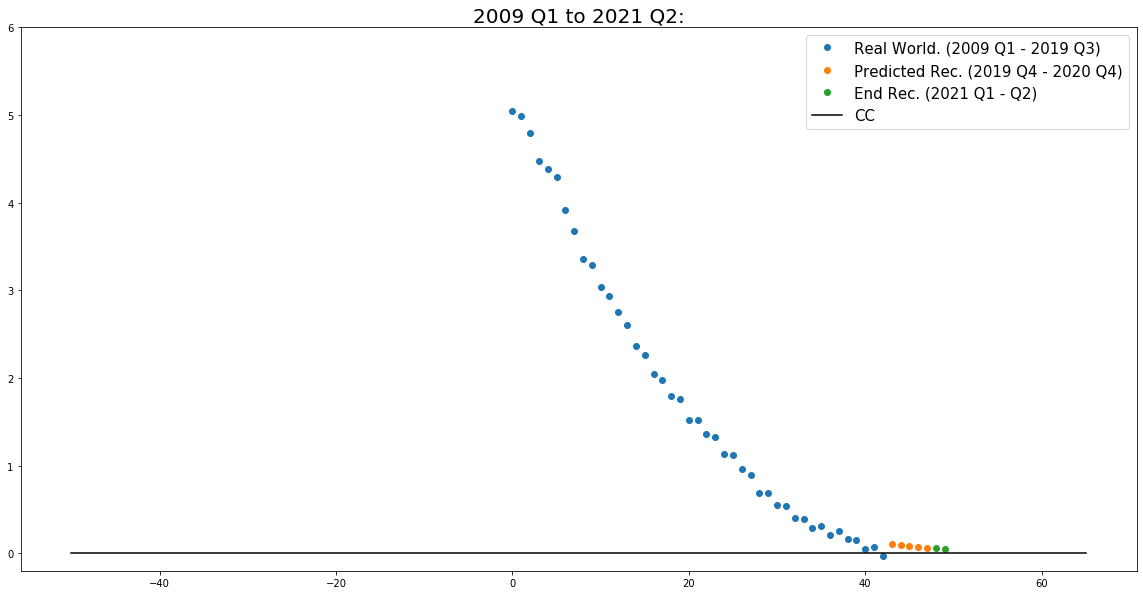

In [16]:
#plot the data

plt.figure(figsize=(20,10))
plt.plot(xdata, cc_ydata, 'o', label='Real World. (2009 Q1 - 2019 Q3)')
plt.plot(pred_x_rec, pred_cc_y_rec, 'o', label='Predicted Rec. (2019 Q4 - 2020 Q4)')
plt.plot(pred_x_end, pred_cc_y_end, 'o', label='End Rec. (2021 Q1 - Q2)')
plt.plot(x,x*0, color='000', label='CC')
plt.ylim(-0.2, 6)
plt.legend(loc='best', fontsize=15)
plt.title("2009 Q1 to 2021 Q2:", fontsize=20)
plt.show()